In [40]:
import warnings
warnings.simplefilter("ignore", UserWarning)

# Import the necesary libraries 
import numpy as np
import pandas as pd

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pylab

from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, f1_score

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18.0, 8.0)

In [3]:
census_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Census_Income/Training_set_census.csv" )
#census_eval = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Census_Income/Testing_set_census.csv')

In [4]:
# Training Set
census_data['marital_status'] = census_data['marital_status'].str.lstrip()
census_data['education'] = census_data['education'].str.lstrip()
census_data['major_industry_code'] = census_data['major_industry_code'].str.lstrip()
census_data['major_occupation_code'] = census_data['major_occupation_code'].str.lstrip()
census_data['race'] = census_data['race'].str.lstrip()
census_data['hispanic_origin'] = census_data['hispanic_origin'].str.lstrip()
census_data['sex'] = census_data['sex'].str.lstrip()
census_data['full_parttime_employment_stat'] = census_data['full_parttime_employment_stat'].str.lstrip()
census_data['country_self'] = census_data['country_self'].str.lstrip()

# Evaluation Set
census_eval['marital_status'] = census_eval['marital_status'].str.lstrip()
census_eval['education'] = census_eval['education'].str.lstrip()
census_eval['major_industry_code'] = census_eval['major_industry_code'].str.lstrip()
census_eval['major_occupation_code'] = census_eval['major_occupation_code'].str.lstrip()
census_eval['race'] = census_eval['race'].str.lstrip()
census_eval['hispanic_origin'] = census_eval['hispanic_origin'].str.lstrip()
census_eval['sex'] = census_eval['sex'].str.lstrip()
census_eval['full_parttime_employment_stat'] = census_eval['full_parttime_employment_stat'].str.lstrip()
census_eval['country_self'] = census_eval['country_self'].str.lstrip()

In [8]:
train_columns = ['age', 'education', 'wage_per_hour', 
       'marital_status', 'major_industry_code', 'major_occupation_code',
       'race', 'hispanic_origin', 'sex', 'full_parttime_employment_stat',
       'capital_gains', 'capital_losses',  'country_self',
       'weeks_worked_in_year']
X_train_raw = census_data[train_columns]
y_train_raw = census_data['income_level']


In [9]:

X_train_raw = pd.concat([X_train_raw, pd.get_dummies(X_train_raw['education'],prefix='education',prefix_sep='_')], axis=1)
X_train_raw = pd.concat([X_train_raw, pd.get_dummies(X_train_raw['marital_status'],prefix='marital_status',prefix_sep='_')], axis=1)
X_train_raw = pd.concat([X_train_raw, pd.get_dummies(X_train_raw['major_industry_code'],prefix='major_industry_code',prefix_sep='_')], axis=1)
X_train_raw = pd.concat([X_train_raw, pd.get_dummies(X_train_raw['major_occupation_code'],prefix='major_occupation_code',prefix_sep='_')], axis=1)
X_train_raw = pd.concat([X_train_raw, pd.get_dummies(X_train_raw['race'],prefix='race',prefix_sep='_')], axis=1)
X_train_raw = pd.concat([X_train_raw, pd.get_dummies(X_train_raw['hispanic_origin'],prefix='hispanic_origin',prefix_sep='_')], axis=1)
X_train_raw = pd.concat([X_train_raw, pd.get_dummies(X_train_raw['sex'],prefix='sex',prefix_sep='_')], axis=1)
X_train_raw = pd.concat([X_train_raw, pd.get_dummies(X_train_raw['full_parttime_employment_stat'],prefix='full_parttime_employment_stat',prefix_sep='_')], axis=1)
X_train_raw = pd.concat([X_train_raw, pd.get_dummies(X_train_raw['country_self'],prefix='country_self',prefix_sep='_')], axis=1)

X_train_raw.drop(['education','marital_status', 'major_industry_code', 'major_occupation_code',
                'race', 'hispanic_origin', 'sex', 'full_parttime_employment_stat','country_self'],axis=1,inplace=True)
                
X_eval_raw.drop(['education','marital_status', 'major_industry_code', 'major_occupation_code',
                'race', 'hispanic_origin', 'sex', 'full_parttime_employment_stat','country_self'],axis=1,inplace=True)


In [10]:
X_train_raw.head()

,age,wage_per_hour,capital_gains,capital_losses,weeks_worked_in_year,education_10th grade,education_11th grade,education_12th grade no diploma,education_1st 2nd 3rd or 4th grade,education_5th or 6th grade,...,country_self_Portugal,country_self_Puerto-Rico,country_self_Scotland,country_self_South Korea,country_self_Taiwan,country_self_Thailand,country_self_Trinadad&Tobago,country_self_United-States,country_self_Vietnam,country_self_Yugoslavia
0,23,0,0,0,30,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,24,0,0,0,26,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,0,0,0,52,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Text(0.5, 1.0, 'Histogram by Age Training Set')

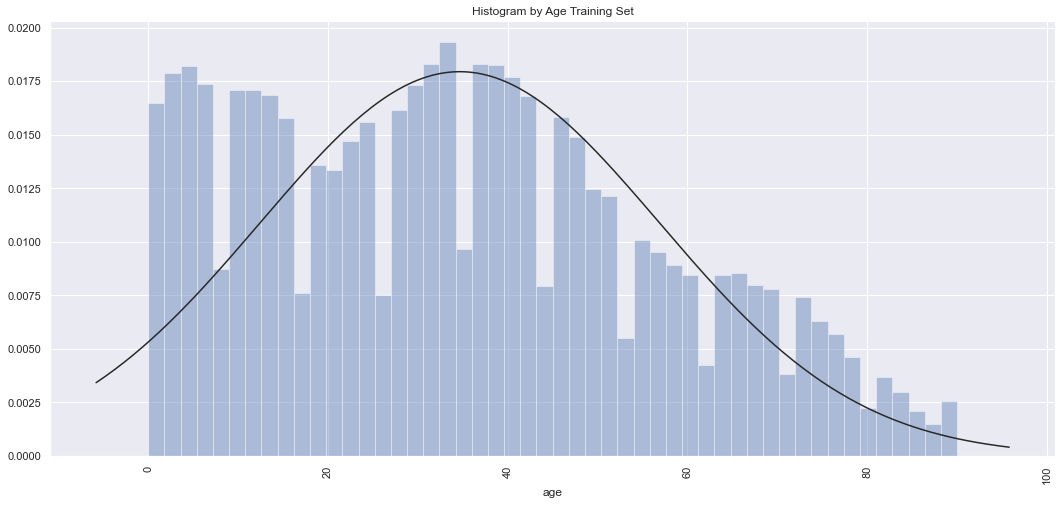

In [13]:
## histogram plot by Age

sns.distplot(X_train_raw['age'],fit=stats.norm, kde=False)
sns.set(color_codes=True)
plt.xticks(rotation=90)
plt.title("Histogram by Age Training Set")

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_train_raw, y_train_raw, test_size = 0.25, random_state = 0)
print('Train Dataset length: {0}'.format(len(X_train)))
print('Test Dataset length: {0}'.format(len(X_test)))

Train Dataset length: 150000
Test Dataset length: 50000


In [56]:
# Prepare the data to execute the Model
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_eval = np.array(X_eval_raw)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Eval Dataset length: 50000


In [57]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [58]:
y_pred  = classifier.predict(X_test)

In [59]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[45558   629]
 [ 2333  1480]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     46187
           1       0.70      0.39      0.50      3813

    accuracy                           0.94     50000
   macro avg       0.83      0.69      0.73     50000
weighted avg       0.93      0.94      0.93     50000



In [60]:
print('Accuracy: {0}'.format(classifier.score(X_train,y_train)))

Accuracy: 0.9431466666666667


In [61]:
print('Accuracy: {0}'.format(f1_score(y_test, y_pred)))

Accuracy: 0.4998311381290105


In [62]:
y_pred_eval = classifier.predict(X_eval)

In [63]:
print(confusion_matrix(y_test,y_pred_eval))
print(classification_report(y_test,y_pred_eval))

[[44348  1839]
 [ 3677   136]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     46187
           1       0.07      0.04      0.05      3813

    accuracy                           0.89     50000
   macro avg       0.50      0.50      0.49     50000
weighted avg       0.86      0.89      0.87     50000



In [64]:
f1_score(y_pred,y_pred_eval)

0.042605288932419196